Beginning Program...
—————————————————————————Summation of two numbers——————————————————————————
Hello World
Summation function running...
Provide input for 1st number:654654
Provide input for 2nd nunmber:4445
Final Sum = 659099
Press Enter to continue...
——————————————————————————Parallelization of Quadratic Expression x^2 + 100x + log(x)——————————————————————————
20 random variables between [1,200k] were selected as x:
Inputs [35860, 84378, 30272, 139010, 191851, 88676, 1781, 186502, 180903, 23199, 146345, 92186, 22532, 149051, 13890, 176168, 141591, 165776, 49857, 106726]
Outputs [1289526610.4873776, 7128085695.343062, 919422194.3179785, 19337682111.8423, 36825992313.164474, 7872301587.392745, 3351068.4849302834, 34801647216.1362, 32743986721.105717, 540514511.0518645, 21431494536.893723, 8507478207.431563, 509945234.0226918, 22231106712.912045, 194322109.53892443, 31052782036.079193, 20062171392.8607, 27498260788.018394, 2490707159.816914, 11401112687.57802]
Let's parallelize this 

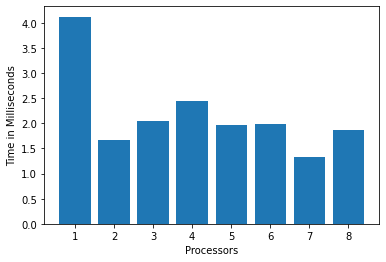

Press Enter to continue...
——————————————————————————Trapezoidal Approximation of 14.3x^5——————————————————————————
Provide an lower limit: 21
Provide an upper limit: 300
How many trapezoids would you like? 2000
[58402644.300000004, 60368389.83771981, 62386713.85670649, 64458664.12520088, 66585302.239633314, 68767703.71527831, 71006958.07690842, 73304168.94944897, 75660454.14863187, 78076945.77165036, 80554790.28781284, 83095148.6291976, 85699196.28130667, 88368123.37372051, 91103134.77075186, 93905450.16210055, 96776304.15350714, 99716946.35740788, 102728641.48358837, 105812669.4298384, 108970325.37260568, 112202919.85765071, 115511778.89070043, 118898244.02810319, 122363672.46748227, 125909437.13839093, 129536926.79296601, 133247546.09658286, 137042715.7185089, 140923872.42255867, 144892469.15774748, 148949975.14894593, 153097875.9875343, 157337673.72205693, 161670886.9488759, 166099050.9028259, 170623717.54786837, 175246455.66774592, 179968850.95663607, 184792506.10980594, 189719040

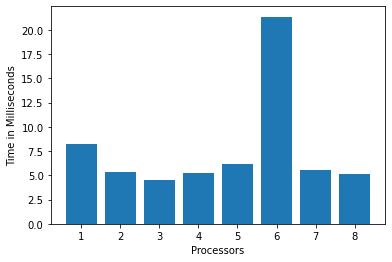

In [8]:
print('Beginning Program...')

import random
import numpy
import time
import multiprocessing
from multiprocessing import get_context
import matplotlib.pyplot as plt

print('—————————————————————————Summation of two numbers——————————————————————————')
print("Hello World")
sum=0

print('Summation function running...')

def summation(enter):
  if enter=='yes':
    a=input('Provide input for 1st number:')
    a=int(a)
    b=input('Provide input for 2nd nunmber:')
    b=int(b)
    sum=a+b
    print('Final Sum =',sum)


summation('yes')
input("Press Enter to continue...")

print('——————————————————————————Parallelization of Quadratic Expression x^2 + 100x + log(x)——————————————————————————')
#Select 20 random values of x between 1 and 200,000
i= 0
x_values = []
for n in range(0,20):
  i=random.randint(1,200000)
  x_values.append(i)
start_time=time.time()
print("20 random variables between [1,200k] were selected as x:")
print("Inputs", x_values)
output_values=[]
for x in x_values:
  t=0
  t = x**2 + 100*x + numpy.log(x) + 1000
  output_values.append(t)
print("Outputs", output_values)


#Define function with which x values will pass through for future parallelization
output_values=[]
def quad(x_values):
  for x in x_values:
    output_values=[]
    t=0
    t = x**2 + 100*x + numpy.log(x) + 1000
    output_values.append(t)
print("Let's parallelize this problem using N processors and compare computation times")
input("Press Enter to continue...")
#Parallelize N processors to run above calculations and compare execution times
time_values=[]
for N in [1,2,3,4,5,6,7,8]:
  pool = multiprocessing.get_context("fork").Pool(N)
  start_time = time.time()
  pool.map(quad,(x_values,))
  pool.close()

  print(N,"Processors")
  final_time=((time.time()-start_time)*1000)
  time_values.append(final_time)
  print('Run Time:',final_time, "Milliseconds")

#Visualization of execution times as N number of processors increases
plt.xlabel('Processors')
plt.ylabel('Time in Milliseconds')
plt.bar([1,2,3,4,5,6,7,8],time_values)
plt.show()
input("Press Enter to continue...")



print('——————————————————————————Trapezoidal Approximation of 14.3x^5——————————————————————————')
#Initialize bounds and partitions for trapezoidal approximation
equation=[]
a=input('Provide an lower limit: ')
a=int(a)
b=input('Provide an upper limit: ')
b=int(b)
n=input('How many trapezoids would you like? ')
n=int(n)
bounds_n_partition=numpy.linspace(a,b,n+1)
#Run & time initial trapezoidal approximation w/o parallelization
for x in bounds_n_partition:
  f=14.3*x**5
  equation.append(f)
  q=0
  for i in equation[+1:-1]:
    q+=i
  h=(b-a)/n
  Trapsum=(h/2)*(equation[0]+equation[-1]+2*q)
print(equation)
print('Trapezoidal Summation:',Trapsum)

#Set up trapezoidal approximation for paraellelization
input('Press Enter to continue to parallelization...')
def TrapezoidalSum(enter):
  start_time=time.time()
  for x in bounds_n_partition:
    f=14.3*x**5
    equation.append(f)
  q=0
  for i in equation[+1:-1]:
    q+=i
  h=(b-a)/n
  Trapsum=(h/2)*(equation[0]+equation[-1]+2*q)

TrapezoidalSum('enter')
#Set n processors to work separate calculations simulataneously
time_values=[]
Processors = [1,2,3,4,5,6,7,8]
for N in Processors:
  pool = multiprocessing.get_context("fork").Pool(N)
  start_time = time.time()
  pool.map(TrapezoidalSum,(bounds_n_partition,))
  pool.close()
#Notice how parallelization works best with higher computations
#Compare between computation times three and three thousand trapezoids
  print(N,"Processors")
  final_time=((time.time()-start_time)*1000)
  time_values.append(final_time)
  print('Run Time:',final_time, "Milliseconds")

#Visualization of parallelization
plt.xlabel('Processors')
plt.ylabel('Time in Milliseconds')
plt.bar(Processors,time_values)
plt.show()